# Data Science Internship - TECHNOHACKS EDUTECH


# Author - Prathamesh Rajendra Goswami


# Task 1 : House Price Prediction



Dataset : https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

# Housing Price Predictor



This project aims to predict house prices in King County, USA, using various features such as number of bedrooms, bathrooms, square footage, and other factors. The dataset contains house sale prices for King County, which includes Seattle, and includes homes sold between May 2014 and May 2015. 

Below is the representation of the dataset.

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


# Step 1: Libraries and Data Loading


First, we import the necessary libraries and load the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_name='E:\Full-Stack DATA SCIENCE & AI/data/kc_house_data_NaN.csv'

In [3]:
df = pd.read_csv(file_name)

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Step 2: Data Wrangling


- We study the dataset
- Drop unnecessary columns
- Handle the missing values in the dataset.

In [5]:
df.shape

(21613, 22)

In [6]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,21613.0,1.080600e+04,6.239280e+03,0.000000e+00,5.403000e+03,1.080600e+04,1.620900e+04,2.161200e+04
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21600.0,3.372870e+00,9.266567e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21603.0,2.115736e+00,7.689959e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00


We drop the columns <code>"id"</code> , <code>"Unnamed: 0"</code> and <code>"date"</code> as they represent unique identifiers and have no relevance to the target variable (house price) prediction.


In [8]:
df = df.drop(["id", "Unnamed: 0", "date"], axis = 1)

df_desc = df.describe()
q1 = df_desc.loc['25%']
q3 = df_desc.loc['75%']
iqr = q3 - q1
df_desc.loc['lower_bound'] = q1 - 1.5 * iqr
df_desc.loc['upper_bound'] = q3 + 1.5 * iqr

df_desc.transpose()

,count,mean,std,min,25%,50%,75%,max,lower_bound,upper_bound
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06,-162625.0000,1.129575e+06
bedrooms,21600.0,3.372870,0.926657,1.0000,3.000,3.0000,4.000,3.300000e+01,1.5000,5.500000e+00
bathrooms,21603.0,2.115736,0.768996,0.5000,1.750,2.2500,2.500,8.000000e+00,0.6250,3.625000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04,-257.5000,4.234500e+03
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06,-3432.0000,1.916000e+04
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00,-0.5000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00,0.0000,0.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00,0.0000,0.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00,1.5000,5.500000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01,5.5000,9.500000e+00


Checking if the dataset has any missing values.


In [9]:
df.isnull().sum()

price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We can see that we have 13 and 10 missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code> respectively.


Replacing the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code>


In [10]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

Replacing the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code>


In [11]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

Checking if the missing values have been removed

In [12]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


- We check for outliers in the data.
- Check distributions within the data.
- Check correlation between features and drop unnecessary features.

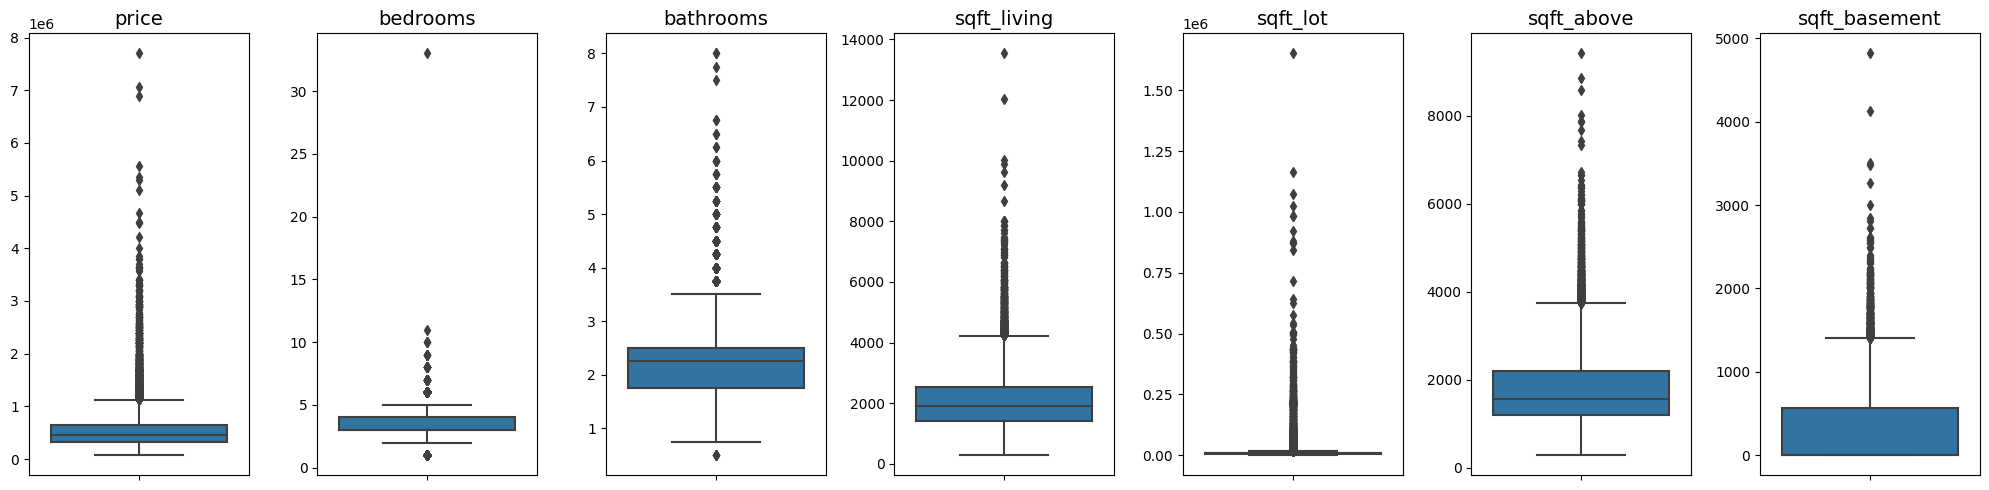

In [13]:

# Select columns for box plot
cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# Create subplots
fig, axes = plt.subplots(1, len(cols), figsize=(20, 5))

# Generate boxplots for each column
for i, col in enumerate(cols):
    sns.boxplot(y=col, data=df, ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('')
    
# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Outliers in the data are checked and removed using box plots for selected columns.

In [14]:
# Remove outliers for price column
price_upper_limit = 5000000
df = df[df['price'] <= price_upper_limit]

# Remove outliers for bedrooms column
bedrooms_upper_limit = 8
df = df[df['bedrooms'] <= bedrooms_upper_limit]

# Remove outliers for bathrooms column
bathrooms_upper_limit = 6
df = df[(df['bathrooms'] < bathrooms_upper_limit) & (df['bathrooms'] >= 1)]

# Remove outliers for sqft_living column
sqft_living_upper_limit = 8500
df = df[df['sqft_living'] <= sqft_living_upper_limit]

# Remove outliers for sqft_lot column
sqft_lot_upper_limit = 60000
df = df[df['sqft_lot'] <= sqft_lot_upper_limit]

# Remove outliers for sqft_above column
sqft_above_upper_limit = 7000
df = df[df['sqft_above'] <= sqft_above_upper_limit]

# Remove outliers for sqft_basement column
sqft_basement_upper_limit = 3000
df = df[df['sqft_basement'] <= sqft_basement_upper_limit]

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,20794.0,533695.239877,347341.772809,75000.0000,320000.000000,449950.0000,638000.0000,4.500000e+06
bedrooms,20794.0,3.370081,0.888393,1.0000,3.000000,3.0000,4.0000,8.000000e+00
bathrooms,20794.0,2.105867,0.748502,1.0000,1.500000,2.2500,2.5000,5.750000e+00
sqft_living,20794.0,2053.278638,872.168077,290.0000,1420.000000,1900.0000,2520.0000,7.710000e+03
sqft_lot,20794.0,9502.361402,8531.709045,520.0000,5000.000000,7499.0000,10160.0000,5.986300e+04
floors,20794.0,1.494085,0.541802,1.0000,1.000000,1.5000,2.0000,3.500000e+00
waterfront,20794.0,0.006973,0.083216,0.0000,0.000000,0.0000,0.0000,1.000000e+00
view,20794.0,0.226219,0.753002,0.0000,0.000000,0.0000,0.0000,4.000000e+00
condition,20794.0,3.412427,0.651256,1.0000,3.000000,3.0000,4.0000,5.000000e+00
grade,20794.0,7.640810,1.145211,1.0000,7.000000,7.0000,8.0000,1.300000e+01


Distributions within the data are examined through count plots for categorical variables.

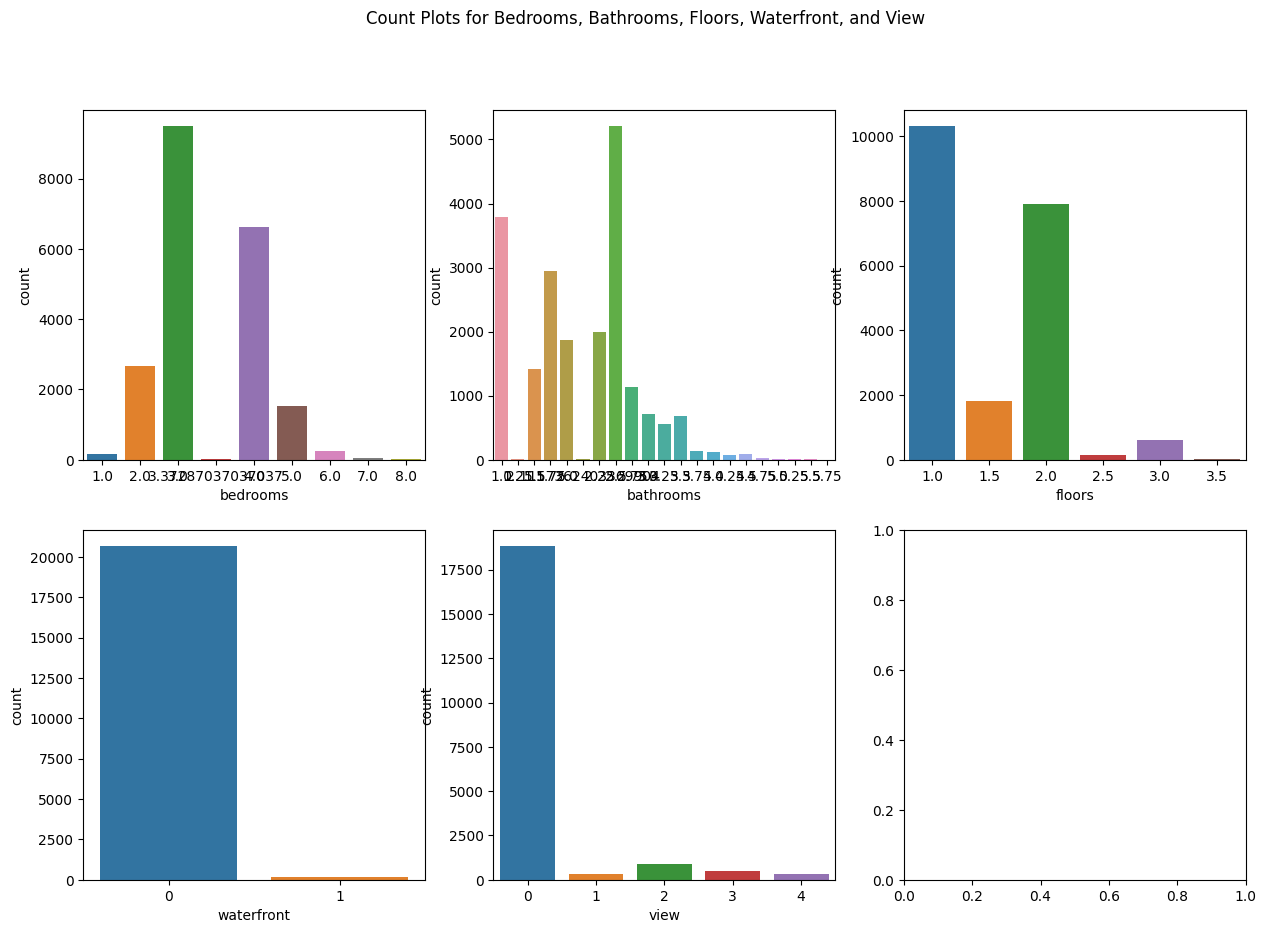

In [15]:
# Define the figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Create count plots for each variable and add them to the subplots
sns.countplot(x='bedrooms', data=df, ax=axes[0,0])
sns.countplot(x='bathrooms', data=df, ax=axes[0,1])
sns.countplot(x='floors', data=df, ax=axes[0,2])
sns.countplot(x='waterfront', data=df, ax=axes[1,0])
sns.countplot(x='view', data=df, ax=axes[1,1])

# Set the title for the entire plot
fig.suptitle("Count Plots for Bedrooms, Bathrooms, Floors, Waterfront, and View")

# Show the plot
plt.show()


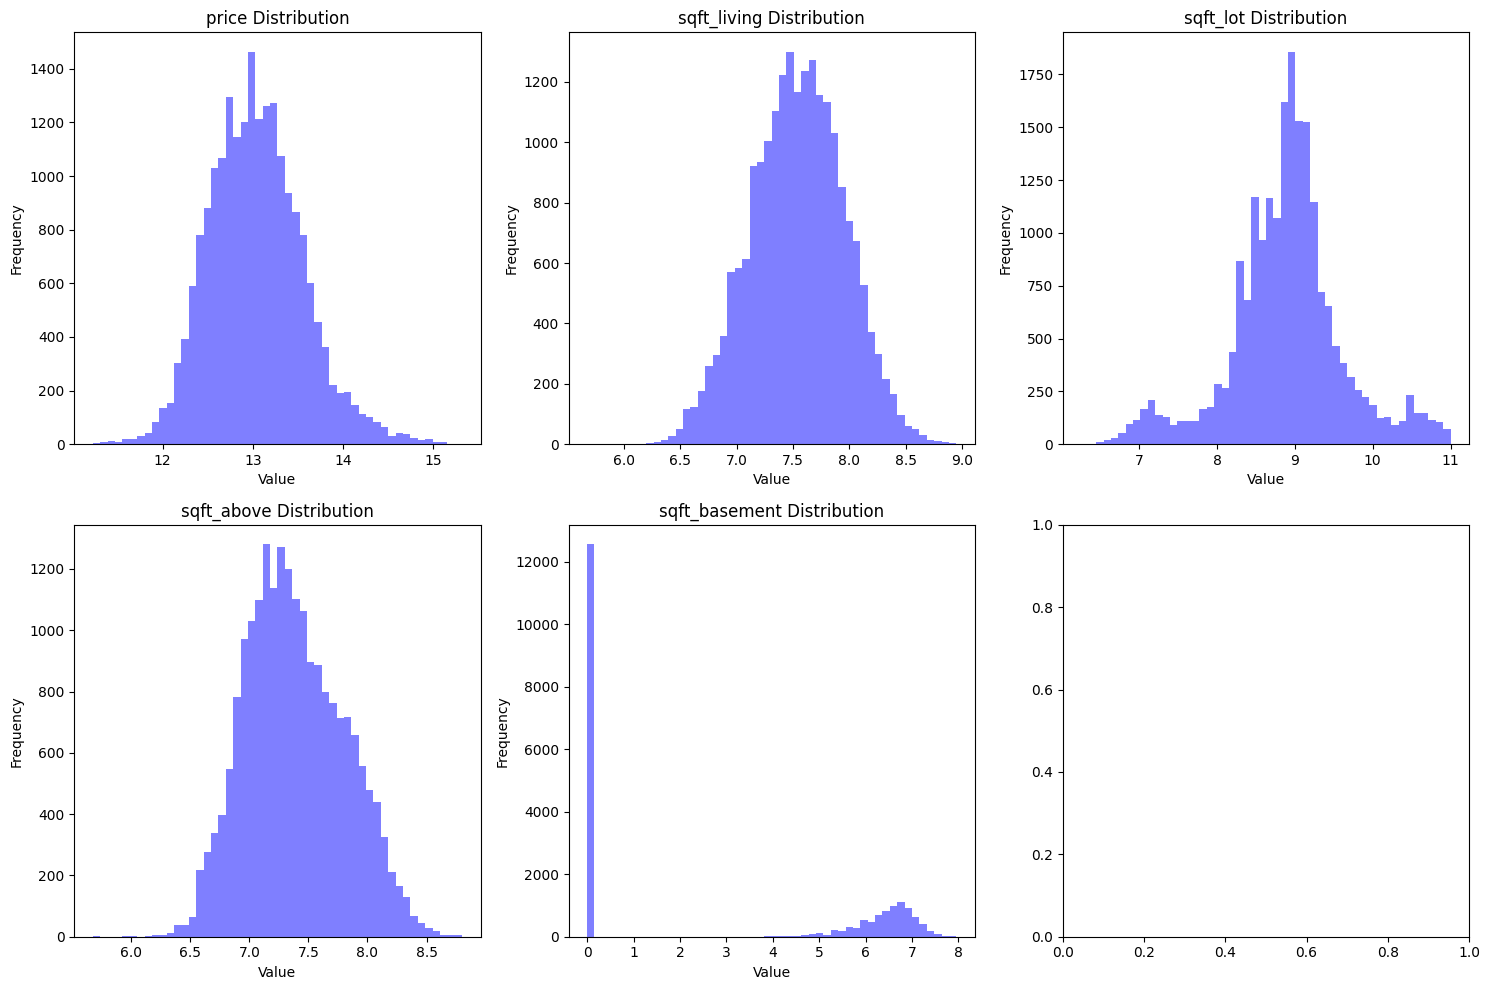

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Identify skewed features
skewed_feats = ['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']

# Log-transform skewed features
for feat in skewed_feats:
    df[feat] = np.log1p(df[feat])

# Visualize the distribution of transformed features
fig, axs = plt.subplots(2, 3, figsize=(15,10))
axs = axs.ravel()
for i, feat in enumerate(skewed_feats):
    axs[i].hist(df[feat], bins=50, color='blue', alpha=0.5)
    axs[i].set_title(feat + ' Distribution', fontsize=12)
    axs[i].set_xlabel('Value', fontsize=10)
    axs[i].set_ylabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()


Correlation between features is analyzed using a correlation matrix and a heatmap.

<AxesSubplot: >

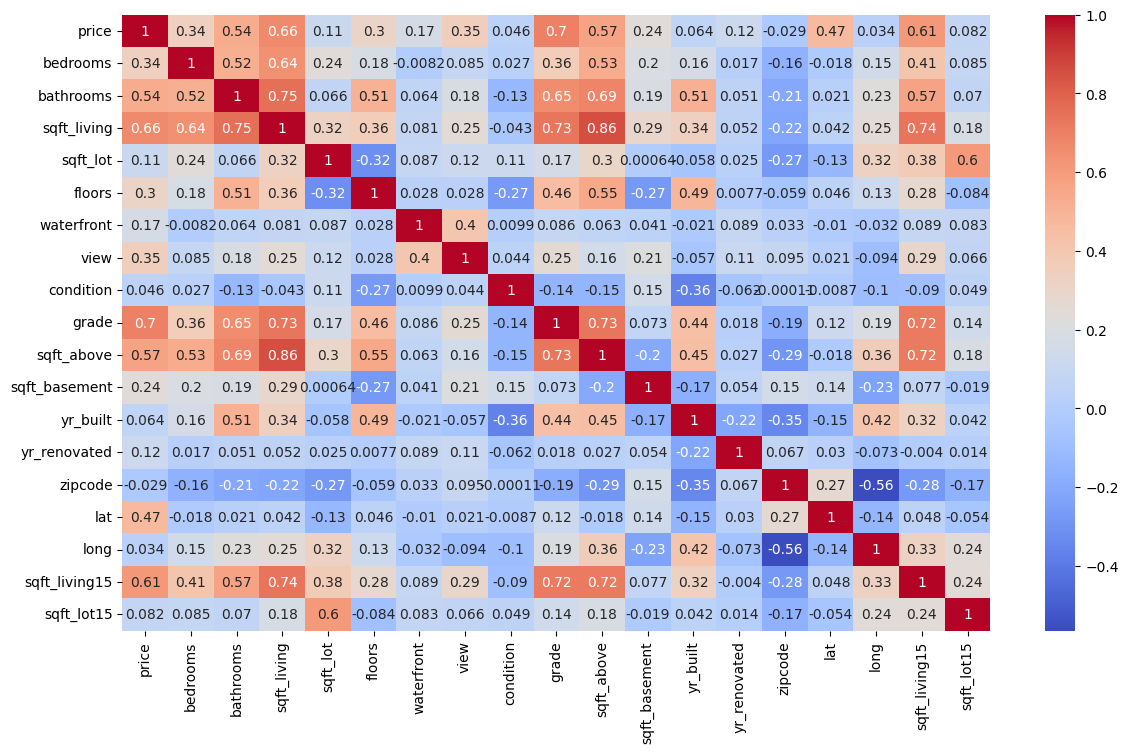

In [17]:
# Create a correlation matrix for numerical variables
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)


As per the analysis:

* The following features show a positive correlation with the target variable <code>"price"</code> :   
<code>"bathrooms"</code>, <code>"sqft_living"</code>, <code>"grade"</code>, <code>"sqft_living"</code>, and <code>"sqft_above"</code>.


* <code>"zipcode"</code>, <code>"yr_built"</code>, and <code>"condition"</code> do not have a significant correlation with <code>"price"</code> and are not adding much value to the dataset. Therefore, we drop these features.

In [18]:
df = df.drop(["zipcode", "yr_built", "condition"], axis = 1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,12.309987,3.0,1.00,7.074117,8.639588,1.0,0,0,7,7.074117,0.000000,0,47.5112,-122.257,1340,5650
1,13.195616,3.0,2.25,7.852050,8.887791,2.0,0,0,7,7.682943,5.993961,1991,47.7210,-122.319,1690,7639
2,12.100718,2.0,1.00,6.647688,9.210440,1.0,0,0,6,6.647688,0.000000,0,47.7379,-122.233,2720,8062
3,13.311331,4.0,3.00,7.581210,8.517393,1.0,0,0,7,6.957497,6.814543,0,47.5208,-122.393,1360,5000
4,13.142168,3.0,2.00,7.427144,8.997271,1.0,0,0,8,7.427144,0.000000,0,47.6168,-122.045,1800,7503



We use some dataframes and visualizations to verify our findings.


In [19]:
Floor_Value_counts = df["floors"].value_counts().to_frame()
Floor_Value_counts

,floors
1.0,10306
2.0,7902
1.5,1820
3.0,610
2.5,148
3.5,8


Plotting a boxplot to determine whether houses with a waterfront view or without a waterfront view have more price outliers. 


<AxesSubplot: xlabel='waterfront', ylabel='price'>

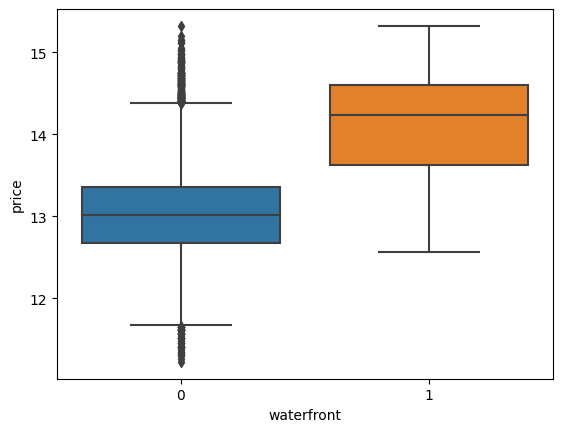

In [20]:
sns.boxplot(x= "waterfront", y = "price", data = df)

Verifying relation between <code>sqft_above</code> and <code>price</code> using Regression plot.


<AxesSubplot: xlabel='sqft_above', ylabel='price'>

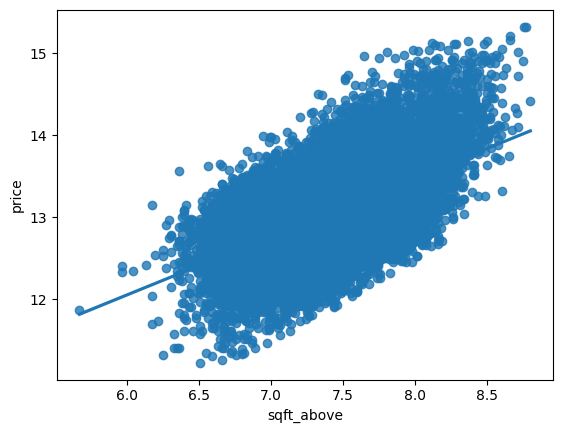

In [21]:
sns.regplot(x="sqft_above", y ="price", data = df)

# Module 4: Model Development & Evaluation


Fitting and evaluating a linear regression model using the  longitude feature <code>'long'</code>


In [22]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.0011452284984929673

Fitting and evaluating a linear regression model to predict the <code>'price'</code> using the feature <code>'sqft_living'</code>

In [23]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.44204386226055525

Fitting and evaluating a linear regression model to predict the <code>'price'</code> using the list of features


In [24]:
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
mlm = LinearRegression()
mlm.fit(features, Y)

LinearRegression()

In [25]:
mlm.score(features, Y)

0.7342623384747267

Created a list of tuples representing different steps in the model development process, including scaling, polynomial transformation, and model construction.

In [26]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

Using the list to create a pipeline object to predict the 'price', fitting and evaluating the object using the features in the list <code>features</code>

In [27]:
pipe = Pipeline(Input)

pipe.fit(features, Y)
yhat = pipe.predict(features)
yhat

array([12.66977835, 13.30471325, 12.98936224, ..., 13.05742812,
       13.13852096, 12.98474908])

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [29]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 6239
number of training samples: 14555


Creating, fitting and evaluating a Ridge regression object using the training data.


In [30]:
from sklearn.linear_model import Ridge

In [31]:
RidgeModel = Ridge(alpha= 0.1)
RidgeModel.fit(x_train, y_train)
RidgeModel.score(x_test,y_test)

0.7337120267659014

Perform a second order polynomial transform on both the training data and testing data. Create, fit and evaluate a Ridge regression object using the training data.

In [32]:
from sklearn.metrics import r2_score
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

ridge = Ridge(alpha=0.1)
ridge.fit(x_train_poly, y_train)

# predict on test data and calculate R^2 score
y_test_pred = ridge.predict(x_test_poly)
r2 = r2_score(y_test, y_test_pred)

print("R^2 score:", r2)

R^2 score: 0.7463272292012417


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.76225e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Applying multiple models on train and test data to find the most effective one.

Appying the SVM model

In [33]:
from sklearn.svm import SVR

svm_reg = SVR()
svm_reg.fit(x_train, y_train)
svm_reg_score = svm_reg.score(x_test, y_test)
print(f"SVM R^2: {svm_reg_score}")

SVM R^2: 0.3856385969944225


Appying the Linear Regression model

In [34]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)
linear_reg_score = linear_reg.score(x_test, y_test)
print(f"Linear Regression R^2: {linear_reg_score}")

Linear Regression R^2: 0.7337155876515986


Appying the Ridge Regression model


In [35]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train, y_train)
ridge_reg_score = ridge_reg.score(x_test, y_test)
print(f"Ridge Regression R^2: {ridge_reg_score}")

Ridge Regression R^2: 0.7337120267659014


Appying the Lasso model


In [36]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train, y_train)
lasso_reg_score = lasso_reg.score(x_test, y_test)
print(f"Lasso Regression R^2: {lasso_reg_score}")

Lasso Regression R^2: 0.48265179638002365


Applying the Decision Tree model

In [37]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)
decision_tree_score = decision_tree.score(x_test, y_test)
print(f"Decision Tree R^2: {decision_tree_score}")

Decision Tree R^2: 0.7073729565794913


Appying the Random Forest model


In [38]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
random_forest_score = random_forest.score(x_test, y_test)
print(f"Random Forest R^2: {random_forest_score}")

Random Forest R^2: 0.846689234914324


Since applying **Random Forest Model** gives the highest score, we use Grid Search on that model to increase the accuracy further

In [39]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

# Create the Random Forest model
random_forest = RandomForestRegressor()

# Initialize GridSearchCV with the model and the hyperparameter grid
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid,
                           cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
best_model_score = best_model.score(x_test, y_test)
print(f"Random Forest with optimized hyperparameters R^2: {best_model_score}")


Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best hyperparameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest with optimized hyperparameters R^2: 0.8510769903543633


## Final Result
This is the final model of our **Housing Prices Predictor** with the accuracy of **85.01%**